In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [144]:
x_train = torch.Tensor([[1.0], [5.0], [6.0], [9.0], [11.0], [15.0], [20.0]])
y_train = torch.Tensor([[0.0], [16.0], [20.0], [20.0], [20.0], [0.0], [0.0]])

input_size = 1
output_size = 1
num_epochs = 20000
learning_rate = 0.003

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = torch.nn.Linear(input_size, 32)
        self.layer2 = torch.nn.Linear(32, 16)
        self.layer3 = torch.nn.Linear(16, 32)
        self.layer4 = torch.nn.Linear(32, output_size)
        
    def forward(self, x):
        s1 = F.relu(self.layer1(x))
        s2 = F.relu(self.layer2(s1))
        s3 = F.relu(self.layer3(s2))
        y_hat = self.layer4(s3)
        return y_hat.sum(1, keepdim=True)

In [145]:
def test(model):
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    plt.plot(x_train.data.numpy(), y_train.data.numpy(), "ro", label="Original data")
    for epoch in range(num_epochs):
        y_hat = model(x_train)
        loss = criterion(y_hat, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 5000 == 0:
            _x = torch.Tensor([[i/10] for i in range(200)])
            _y = model(_x)
            plt.plot(_x.data.numpy(), _y.data.numpy(), label="epoch=" + str(epoch + 1))

    plt.legend()
    plt.show()

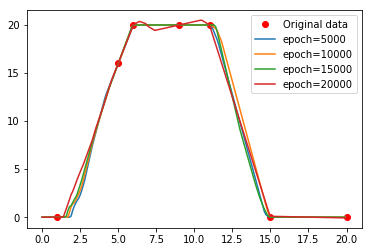

In [146]:
model1 = Model()
test(model1)

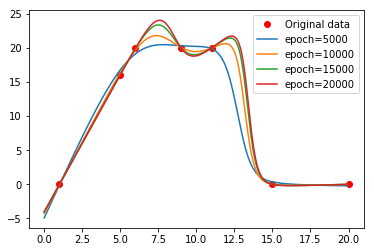

In [147]:
model1 = Model()
test(model1)

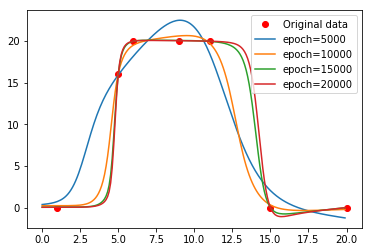

In [148]:
model2 = Model()
test(model2)

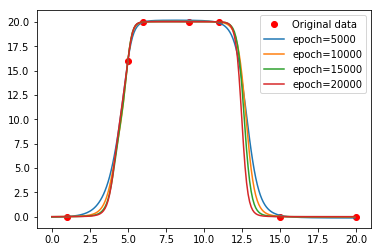

In [192]:
model3 = Model()
test(model3)